In [1]:
# Load dataset
from tensorflow.keras.datasets import imdb
max_features = 10000        # corpus size
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
# Sequence padding
from tensorflow.keras.preprocessing import sequence
max_len = 100               # max length of each sentence
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [3]:
# Mapping (word -> integer)
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 1s 0us/step


In [4]:
# Inverse mapping (integer -> word)
reverse_word_index = dict([(value + 3, key) for (key, value) in word_index.items()])
reverse_word_index[0] = '<PAD>'
reverse_word_index[1] = '<START>'
reverse_word_index[2] = '<UNK>'
reverse_word_index[3] = '<UNUSED>'

In [5]:
# Decode first review
decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in x_train[0]])
print(decoded_review)

cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all


In [6]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
# Check shape of dataset
print(x_train.shape)
print(x_test.shape)
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(25000, 100)
(25000, 100)
(25000, 2)
(25000, 2)


In [9]:
# Build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
model = Sequential()
model.add(Embedding(max_features, 64))                                  # 10000 * 64 = 640000
model.add(SimpleRNN(32, activation='tanh', return_sequences=False))     # (64 + 32 + 1) * 32 = 3104
model.add(Dense(16, activation='tanh'))                                 # (32 + 1) * 16 = 528
model.add(Dense(2, activation='softmax'))                               # (16 + 1) * 2 = 34
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 643666 (2.46 MB)
Trainable params: 643666 (2.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Compile
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Fit the model
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 8s 37ms/step - loss: 0.5845 - accuracy: 0.6808 - val_loss: 0.4616 - val_accuracy: 0.7948
Epoch 2/10
176/176 [==============================] - 8s 43ms/step - loss: 0.3645 - accuracy: 0.8456 - val_loss: 0.3668 - val_accuracy: 0.8408
Epoch 3/10
176/176 [==============================] - 7s 42ms/step - loss: 0.2762 - accuracy: 0.8904 - val_loss: 0.3604 - val_accuracy: 0.8436
Epoch 4/10
176/176 [==============================] - 7s 39ms/step - loss: 0.2137 - accuracy: 0.9200 - val_loss: 0.3737 - val_accuracy: 0.8424
Epoch 5/10
176/176 [==============================] - 10s 57ms/step - loss: 0.1561 - accuracy: 0.9451 - val_loss: 0.4285 - val_accuracy: 0.8332
Epoch 6/10
176/176 [==============================] - 12s 67ms/step - loss: 0.1026 - accuracy: 0.9668 - val_loss: 0.5523 - val_accuracy: 0.8160
Epoch 7/10
176/176 [==============================] - 8s 46ms/step - loss: 0.0595 - accuracy: 0.9833 - val_loss: 0.5366 - val_accuracy: 0.83

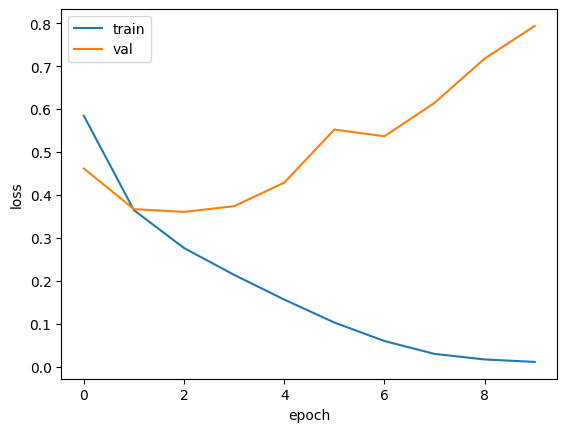

In [13]:
# Visualize loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

782/782 [==============================] - 6s 8ms/step - loss: 0.7949 - accuracy: 0.8205
Test loss: 0.7949
Test accuracy: 0.8205


In [15]:
# Prediction
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
preds = model.predict(x_test)
labels = [0, 1]
preds_max = [labels[np.argmax(probs)] for probs in preds]
print(confusion_matrix(y_test, preds_max))
print(classification_report(y_test, preds_max))

782/782 [==============================] - 7s 8ms/step
[[ 9898  2602]
 [ 1886 10614]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82     12500
           1       0.80      0.85      0.83     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000

